# Linear Regression

#### The very first step to perform linear regression is to import required libraries, for this we will be importing Pandas, Numpy & Matplot as shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
%matplotlib inline

#### Now we will import the dataSet to perform linear regression on it. We will be reading data from a remote link. 

In [2]:
url = "http://bit.ly/w-data"
l_data = pd.read_csv(url)
print("Successfully imported data")

Successfully imported data


#### To view our dataSet entries we can use diffrent command like "head()" to view our dataSet from the top and "tail()" to view our dataSet from the bottom.

In [3]:
l_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
l_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting Graph

 We will be ploting a grap to see if there is any relationship
 between data

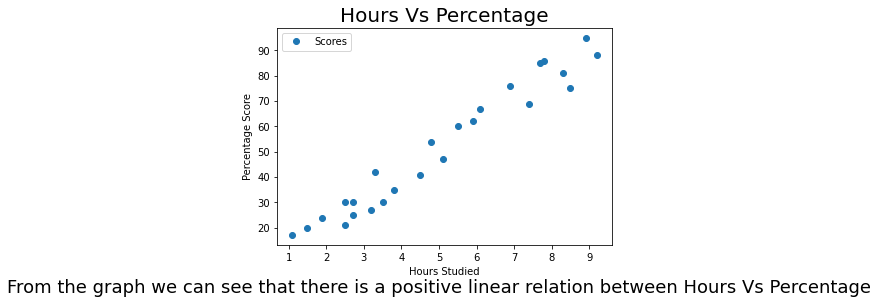

In [5]:
l_data.plot(x="Hours", y="Scores", style="o")
plts.title("Hours Vs Percentage", fontsize=20)
plts.xlabel("Hours"+" "+"Studied")
plts.ylabel("Percentage"+" "+"Score")
plts.figtext(0.5,-0.04, "From the graph we can see that there is a positive linear relation between Hours Vs Percentage", ha="center", fontsize=18)
plts.show()

## Preparing Data

#### First we divide the data into attributes(inputs) and labels(outputs)

In [6]:
print("Mean of hours of study : ", l_data["Hours"].mean())
print("Mean of score obtained : ", l_data["Scores"].mean())
print("Variance of hours of study : ", l_data["Hours"].var())
print("Variance of score obtained of data : ", l_data["Scores"].var())

Mean of hours of study :  5.012
Mean of score obtained :  51.48
Variance of hours of study :  6.3761
Variance of score obtained of data :  639.4266666666666


In [7]:
X= l_data.iloc[:, :-1].values
y= l_data.iloc[:, : 1].values

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Training the Algorithm

#### Till now we have split our data into training and testing sets, and now we will train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 
print("Completed Training")

Completed Training


## Plotting Regression Line

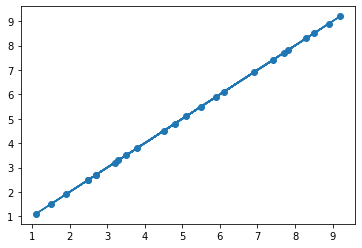

In [11]:
line = reg.coef_*X+reg.intercept_
plts.scatter(X,y)
plts.plot(X, line);
plts.show()

## Making Prediction

#### As we have trained our algorithm, Now we will make prediction.

In [12]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
print("Intercept : ", reg.intercept_)
print("Slope of regresion line : ", reg.coef_)

Intercept :  [-8.8817842e-16]
Slope of regresion line :  [[1.]]


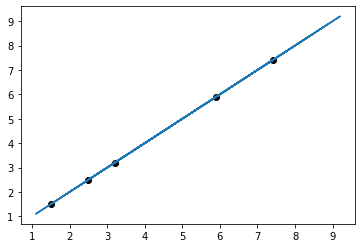

In [14]:
plts.scatter(X_test, y_pred, color='black')
plts.plot(X,line)

In [15]:
df = pd.DataFrame({"Actual": [y_test], "Predicted": [y_pred]})
df

,Actual,Predicted
0,"[[1.5], [3.2], [7.4], [2.5], [5.9]]","[[1.4999999999999996], [3.2], [7.4000000000000..."


## Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [16]:
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  3.552713678800501e-16
